# TRANSFER LEARNING MODEL

# AIDI 2000: ASSIGNMENT 2

Group Members:
- Zaina Firosh Kamal
- Preyaskumar Jayswal
- Kintu Declan Trevor

Import Libraries.

In [7]:
# Generic
import pandas as pd 
from tensorflow.keras.layers import Dense, Conv1D, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

Load Dataset.

In [8]:
data = pd.read_csv("movie.csv")
data.dropna(inplace=True)
print(data.describe())
print(data.head())

              label
count  40000.000000
mean       0.499525
std        0.500006
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


Preprocess and split data.

In [9]:
text = data["text"].str.lower()
y = data["label"]

# Define the vocabulary size and embedding dimension
vocab_size = 10000
embedding_dim = 128
max_len = 100

# Tokenize the text data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.3, random_state=42)

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Define and train model.

In [10]:
# Define Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(16, 3, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(2, activation='softmax')
])

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
875/875 [==============================] - 46s 49ms/step - loss: 0.3944 - accuracy: 0.8269 - val_loss: 0.3271 - val_accuracy: 0.8553
Epoch 2/10
875/875 [==============================] - 39s 45ms/step - loss: 0.2498 - accuracy: 0.8986 - val_loss: 0.3362 - val_accuracy: 0.8554
Epoch 3/10
875/875 [==============================] - 39s 45ms/step - loss: 0.2022 - accuracy: 0.9208 - val_loss: 0.3665 - val_accuracy: 0.8517
Epoch 4/10
875/875 [==============================] - 40s 45ms/step - loss: 0.1668 - accuracy: 0.9370 - val_loss: 0.4059 - val_accuracy: 0.8443
Epoch 5/10
875/875 [==============================] - 40s 45ms/step - loss: 0.1379 - accuracy: 0.9500 - val_loss: 0.4638 - val_accuracy: 0.8432
Epoch 6/10
875/875 [==============================] - 42s 48ms/step - loss: 0.1149 - accuracy: 0.9597 - val_loss: 0.5300 - val_accuracy: 0.8355
Epoch 7/10
875/875 [==============================] - 42s 48ms/step - loss: 0.0939 - accuracy: 0.9690 - val_loss: 0.5968 - val_accuracy:

Evaluate model performance.

In [11]:
# Evaluate your model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

375/375 [==============================] - 5s 13ms/step - loss: 0.8787 - accuracy: 0.8268
Test Loss: 0.878685474395752
Test Accuracy: 0.8268333077430725


Plot graph of model performance.

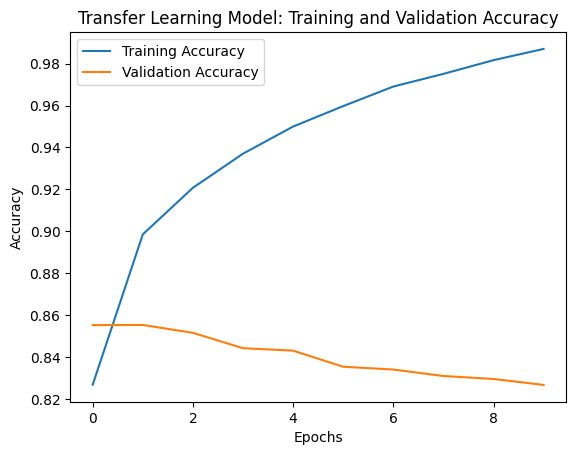

In [12]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Transfer Learning Model: Training and Validation Accuracy')
plt.legend()
plt.show()